## ETL and Data Cleaning

In [38]:
import pandas as pd

### Load Datasets

In [39]:
df_mat = pd.read_csv('../data/raw/student-mat.csv', sep=';')
df_por = pd.read_csv('../data/raw/student-por.csv', sep=';')

#### Data Descriptions

| Column        | Description                                                                                   |
|---------------|----------------------------------------------------------------------------------------------|
| school        | Student’s school (‘GP’ - Gabriel Pereira, ‘MS’ - Mousinho da Silveira)                       |
| sex           | Student’s sex (‘F’ - female, ‘M’ - male)                                                     |
| age           | Student’s age (15 to 22)                                                                     |
| address       | Home address type (‘U’ - urban, ‘R’ - rural)                                                 |
| famsize       | Family size (‘LE3’ - ≤3, ‘GT3’ - >3)                                                         |
| Pstatus       | Parent’s cohabitation status (‘T’ - together, ‘A’ - apart)                                   |
| Medu          | Mother’s education (0 - none, 1 - primary, 2 - 5th–9th grade, 3 - secondary, 4 - higher)     |
| Fedu          | Father’s education (same as Medu)                                                            |
| Mjob          | Mother’s job (‘teacher’, ‘health’, ‘services’, ‘at_home’, ‘other’)                           |
| Fjob          | Father’s job (same as Mjob)                                                                  |
| reason        | Reason to choose school (‘home’, ‘reputation’, ‘course’, ‘other’)                            |
| guardian      | Student’s guardian (‘mother’, ‘father’, ‘other’)                                             |
| traveltime    | Home to school travel time (1 - <15 min, 2 - 15–30 min, 3 - 30–60 min, 4 - >60 min)          |
| studytime     | Weekly study time (1 - <2 hours, 2 - 2–5 hours, 3 - 5–10 hours, 4 - >10 hours)               |
| failures      | Number of past class failures (1–3, or 4 if ≥4)                                               |
| schoolsup     | Extra educational support (‘yes’ or ‘no’)                                                    |
| famsup        | Family educational support (‘yes’ or ‘no’)                                                   |
| paid          | Extra paid classes within course subject (‘yes’ or ‘no’)                                     |
| activities    | Extra-curricular activities (‘yes’ or ‘no’)                                                  |
| nursery       | Attended nursery school (‘yes’ or ‘no’)                                                      |
| higher        | Wants to take higher education (‘yes’ or ‘no’)                                               |
| internet      | Internet access at home (‘yes’ or ‘no’)                                                      |
| romantic      | With a romantic relationship (‘yes’ or ‘no’)                                                 |
| famrel        | Quality of family relationships (1 - very bad to 5 - excellent)                              |
| freetime      | Free time after school (1 - very low to 5 - very high)                                       |
| goout         | Going out with friends (1 - very low to 5 - very high)                                       |
| Dalc          | Workday alcohol consumption (1 - very low to 5 - very high)                                  |
| Walc          | Weekend alcohol consumption (1 - very low to 5 - very high)                                  |
| health        | Current health status (1 - very bad to 5 - very good)                                        |
| absences      | Number of school absences (0 to 93)                                                          |
| G1            | First period grade (0 to 20)                                                                 |
| G2            | Second period grade (0 to 20)                                                                |
| G3            | Final grade (0 to 20)                                                                        |
| at_risk       | 1 if G3 < 10 (student is at risk), 0 otherwise                                               |

In [40]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [41]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [42]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [43]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [44]:
df_mat["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [45]:
df_mat["G3"].value_counts().sort_index()

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

In [46]:
df_mat["at_risk"] = (df_mat["G3"] < 10).astype(int)

In [47]:
df_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
at_risk       0
dtype: int64

In [48]:
df_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
at_risk        int64
dtype: object

In [49]:
numerical = df_mat.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df_mat.select_dtypes(include=['object']).columns.tolist()

In [50]:
df_mat["at_risk"].value_counts(normalize=True)

at_risk
0    0.670886
1    0.329114
Name: proportion, dtype: float64

### Correlation Heatmap (Numerical Features)

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

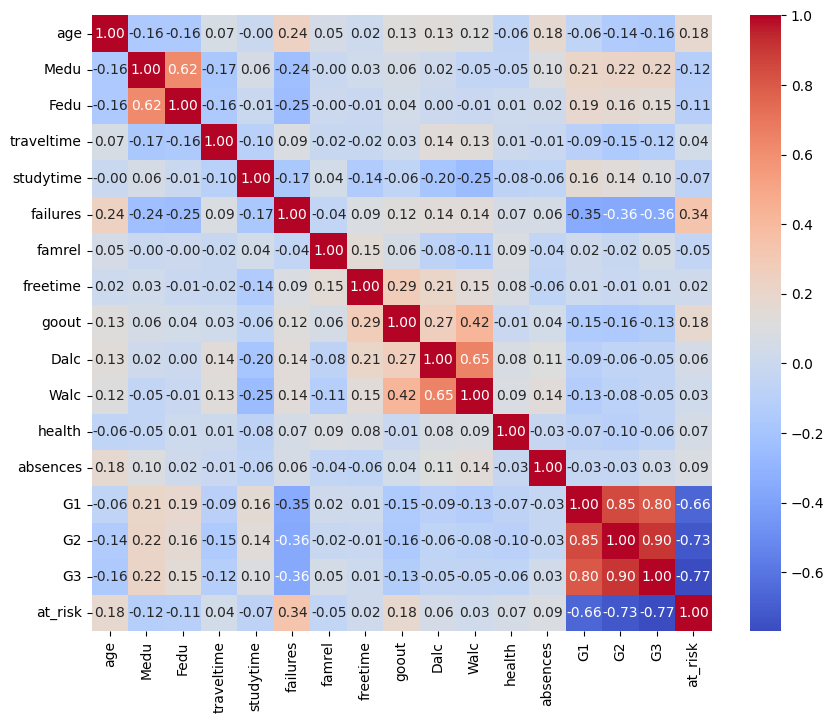

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_mat[numerical].corr(), annot=True, fmt=".2f", cmap='coolwarm')

### Mutual Information (Categorical Features)

In [53]:
from sklearn.feature_selection import mutual_info_classif

In [54]:
X = df_mat[categorical]
y = df_mat["at_risk"]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Compute mutual information scores
mi_scores = mutual_info_classif(X_encoded, y, discrete_features=True)
mi_series = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)
mi_series.head(10)

higher_yes           0.011503
guardian_other       0.005507
schoolsup_yes        0.004783
romantic_yes         0.004713
paid_yes             0.004320
Mjob_health          0.003491
Mjob_other           0.002726
sex_M                0.002501
reason_reputation    0.002343
internet_yes         0.001865
dtype: float64

### Feature Selections and Train Test Split

In [55]:
selected_features = [
    # Categorical features
    "higher", "schoolsup", "romantic", "paid", "guardian", "Mjob", "reason", "internet", "sex",

    # LifeStyle related Numerical Features
    "absences", "studytime", "freetime", "health", "goout", "Dalc", "Walc"
]

X = df_mat[selected_features]
y = df_mat["at_risk"]

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Encode and Save Clean Data

In [57]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,absences,studytime,freetime,health,goout,Dalc,Walc,higher_yes,schoolsup_yes,romantic_yes,...,guardian_other,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_home,reason_other,reason_reputation,internet_yes,sex_M
0,6,2,3,3,4,1,1,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,4,2,3,3,3,1,1,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,10,2,3,3,2,2,3,True,True,False,...,False,False,False,False,False,False,True,False,True,False
3,2,3,2,5,2,1,1,True,False,True,...,False,True,False,False,False,True,False,False,True,False
4,4,2,3,5,2,1,2,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [59]:
df_cleaned = X_encoded.copy()
df_cleaned["at_risk"] = y.reset_index(drop=True)

df_cleaned.to_csv('../data/processed/student_mat_cleaned.csv', index=False)